In [1]:
from osgeo import ogr


In [2]:
path = 'data/Section-2/kunming_wgs84.gpkg'
path_out = 'data/Section-4/kunming_utm48.gpkg'


In [3]:
utm_epsg = 32648 
## 1. 读入矢量数据
in_ds = ogr.Open(path)
in_layer = in_ds.GetLayer(0)

## 2. 创建新的空间参考
utm_srs = ogr.osr.SpatialReference()
utm_srs.ImportFromEPSG(utm_epsg)

## 3. 创建写出数据及矢量图层
driver = ogr.GetDriverByName('GPKG')
out_ds = driver.CreateDataSource(path_out)
out_layer = out_ds.CreateLayer('kunming_utm48', \
                               geom_type=ogr.wkbPolygon, \
                                srs=utm_srs)

## 4. 创建转换对象，并进行投影转换
spatialRef = in_layer.GetSpatialRef()
cor_transform = ogr.osr.CoordinateTransformation(spatialRef, utm_srs)
print(cor_transform)

for i in range(in_layer.GetFeature(1).GetFieldCount()):
    field_defn = in_layer.GetFeature(1).GetFieldDefnRef(i)
    out_layer.CreateField(field_defn)

fea_defn = in_layer.GetLayerDefn()
for i in range(in_layer.GetFeatureCount()):
    in_fea = in_layer.GetFeature(i+1) 
    in_geo = in_fea.geometry()   
    in_geo.Transform(cor_transform)
    out_fea = ogr.Feature(fea_defn)
    out_fea.SetGeometry(in_geo)
    for j in range(fea_defn.GetFieldCount()):
        field_value = in_fea.GetField(j)
        out_fea.SetField(j, field_value)
    out_layer.CreateFeature(out_fea)  
ds = None
out_ds = None


<osgeo.osr.CoordinateTransformation; proxy of <Swig Object of type 'OSRCoordinateTransformationShadow *' at 0x00000255298B34B0> >


In [2]:
path_utm = 'data/Section-4/kunming_utm48.gpkg'


In [4]:
# ds = ogr.Open(path, 1)
# layer = ds.GetLayer(0)
# id_field = layer.GetFeature(1).GetFieldIndex('dt_adcode')
# layer.DeleteField(id_field)
# ds = None


In [5]:
ds = ogr.Open(path, 1)
layer = ds.GetLayer(0)
field_defn = ogr.FieldDefn('Area(km2)', ogr.OFTReal)
layer.CreateField(field_defn)
area_dt, name_dt = [], []
for i in range(layer.GetFeatureCount()):
    fea = layer.GetFeature(i+1)
    fea_area = fea.geometry().Area()
    fea_area = fea_area/1000000
    area_dt.append(fea_area)
    fea_name = fea.GetField('dt_name')
    name_dt.append(fea_name)
    print(fea_area)
    fea.SetField('Area(km2)', fea_area)
    layer.SetFeature(fea)
ds = None


388.68132965333547
864.295296736931
638.33361729476
887.0758120914002
1866.1175875335928
499.36396388766826
1338.5644973111446
994.1854960593394
1914.092175416861
1681.4133762503427
828.4756858595103
4227.121468713026
3598.3429000372294
1301.1314514651406


<BarContainer object of 14 artists>

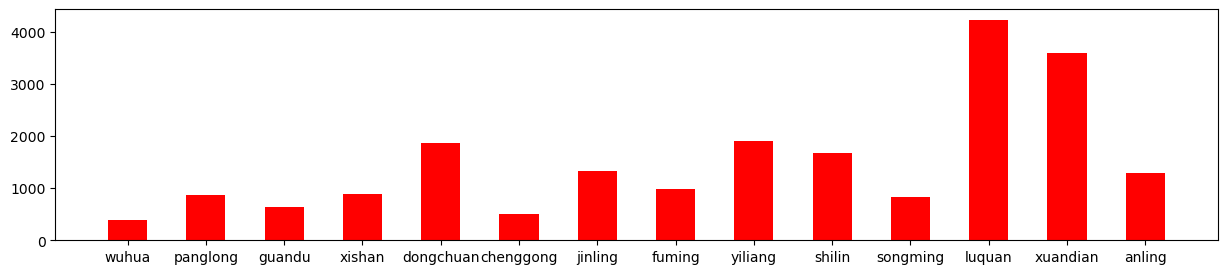

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(15,3))
ax.bar(name_dt, area_dt, color='red', width=0.5)



In [3]:
path = 'data/Section-4/kunming_utm48_centroid.gpkg'
in_ds = ogr.Open(path_utm, 0)
in_layer = in_ds.GetLayer(0)

in_SpatialRef = in_layer.GetSpatialRef()
driver = ogr.GetDriverByName('GPKG')
out_ds = driver.CreateDataSource(path)
out_layer = out_ds.CreateLayer('kunming_utm48_centroid', geom_type=ogr.wkbPoint, srs=in_SpatialRef)

field_defn = ogr.FieldDefn('fid', ogr.OFTInteger)
out_layer.CreateField(field_defn)

out_fea_defn = out_layer.GetLayerDefn()

for i in range(in_layer.GetFeatureCount()):
    in_fea = in_layer.GetFeature(i+1)
    out_geo = in_fea.geometry().Centroid()
    out_fea = ogr.Feature(out_fea_defn)
    out_fea.SetGeometry(out_geo)
    out_fea.SetField('fid', i+1)   
    out_layer.CreateFeature(out_fea)
ds = None
out_ds = None


(103.837, 24.832), (102.842, 24.836),(102.849,24.836),(102.857,24.835),(102.864, 24.828)
(102.855,24.826), (102.845, 24.821), (102.837, 24.832)



In [3]:
path_ynu = 'data/Section-4/ynu_vec.gpkg'
ynu_wkt = "POLYGON ((102.837 24.832, 102.842 24.836, 102.849 24.836, 102.857 24.835, 102.864 24.828, 102.855 24.826, 102.845 24.821, 102.837 24.832))"
geo_ynu = ogr.CreateGeometryFromWkt(ynu_wkt)
geo_ynu

spatialRef = ogr.osr.SpatialReference()
spatialRef.ImportFromEPSG(4326)

driver = ogr.GetDriverByName('GPKG')
ds_ynu = driver.CreateDataSource(path_ynu)
layer_ynu = ds_ynu.CreateLayer('ynu_vec', srs=spatialRef, geom_type=ogr.wkbPolygon)
field_defn = ogr.FieldDefn('fid', ogr.OFTInteger)
layer_ynu.CreateField(field_defn)
fea_defn = layer_ynu.GetLayerDefn()
fea_ynu = ogr.Feature(fea_defn)
fea_ynu.SetField('fid', 1)
fea_ynu.SetGeometry(geo_ynu)
layer_ynu.CreateFeature(fea_ynu)
ds_ynu = None
